In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install indic-nlp-library

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [4]:
# Load the JSON data
with open('../../Dataset/Test-A-gold.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [5]:
# Extract domains, contexts, and QAs
domains = data['domains']

In [6]:
# Create lists to store data
contexts = []
questions = []
answers = []
domain_names = []

In [7]:
for domain in domains:
    domain_name = domain['domain']
    for context in domain['contexts']:
        for qa in context['qas']:
            domain_names.append(domain_name)
            contexts.append(context['context'])
            questions.append(qa['question'])
            answers.append(qa['answer'])

In [8]:
# Create a Pandas DataFrame
df = pd.DataFrame({
    'Domain': domain_names,
    'Context': contexts,
    'Question': questions,
    'Answer': answers
})

In [9]:
df.head()

,Domain,Context,Question,Answer
0,kund,अगस्त्य कुंड में दिव्यांगों के लिए कोई विशेष स...,क्या अगस्त्य कुंड में दिव्यांगों के लिए कोई वि...,"नहीं, अगस्त्य कुंड में दिव्यांगों के लिए कोई व..."
1,kund,अगस्त्य कुंड में दिव्यांगों के लिए कोई विशेष स...,क्या अगस्त्य कुंड का निर्माण पारंपरिक रूप से क...,"हाँ, अगस्त्य कुंड का निर्माण पारंपरिक रूप से क..."
2,kund,लोलार्क कुंड में पूजा करने के लिए श्रद्धालु पह...,लोलार्क कुंड में पूजा करने का क्या तरीका है?,लोलार्क कुंड में पूजा करने के लिए श्रद्धालु कु...
3,kund,लोलार्क कुंड में पूजा करने के लिए श्रद्धालु पह...,लोलार्क कुंड में श्रद्धालु पूजा किस क्रम से कर...,"पहले, लोलार्क कुंड में स्नान करते हैं, उसके बा..."
4,kund,लोलार्क कुंड में पूजा करने के लिए श्रद्धालु पह...,लोलार्क कुंड के पास की मंदिर में पूजा विधि कैस...,लोलार्क कुंड के पास की मंदिर में पुजारी को पूज...


In [10]:
df.to_csv('test-A.csv', index=False)

In [11]:
# Perform analysis

## 1. Domain Distribution
domain_dist = df['Domain'].value_counts()
print("Domain Distribution:")
print(domain_dist)

Domain Distribution:
Domain
temple         1255
travel          780
ashram          492
kund            233
museum          105
general_qna      16
cruise            8
aarti             7
foodcourt         4
toilet            2
Name: count, dtype: int64


In [12]:
## 2. Context Length Distribution
context_len = df['Context'].apply(len)
print("Average Context Length:", context_len.mean())

Average Context Length: 469.3731909028256


In [13]:
## 3. Question Length Distribution
question_len = df['Question'].apply(len)
print("Average Question Length:", question_len.mean())

Average Question Length: 70.22880771881461


In [14]:
## 4. Answer Length Distribution
answer_len = df['Answer'].apply(len)
print("Average Answer Length:", answer_len.mean())

Average Answer Length: 89.64369400413509


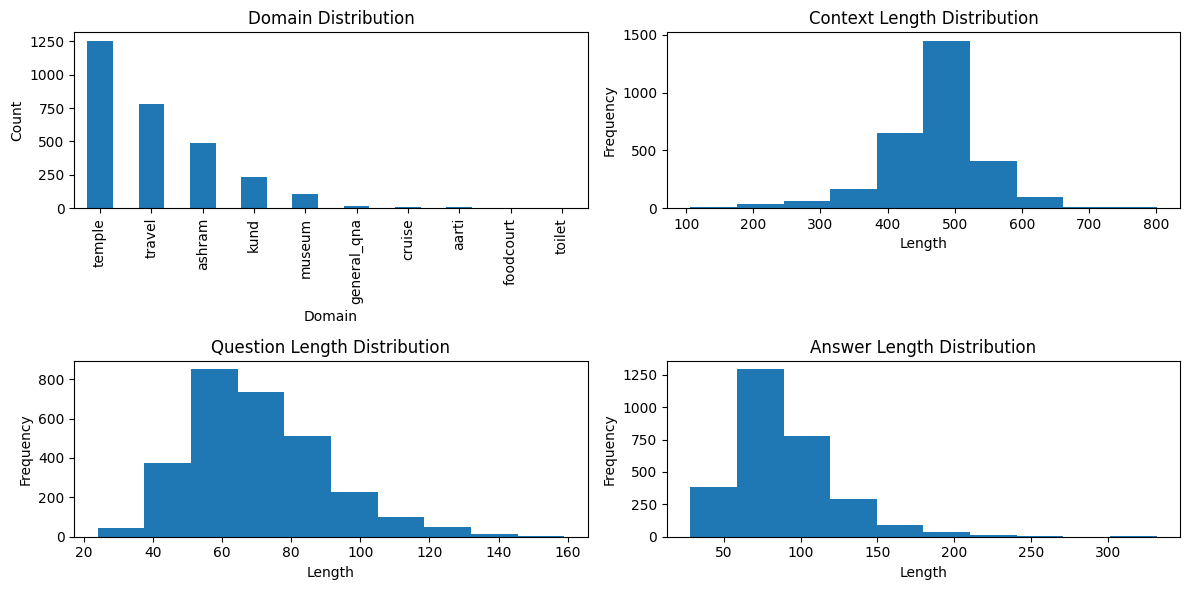

In [15]:
# Plot graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
domain_dist.plot(kind='bar')
plt.title('Domain Distribution')
plt.xlabel('Domain')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(context_len, bins=10)
plt.title('Context Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(question_len, bins=10)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(answer_len, bins=10)
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
len(df['Question']), len(set(df['Context']))

(2902, 1143)